In [170]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

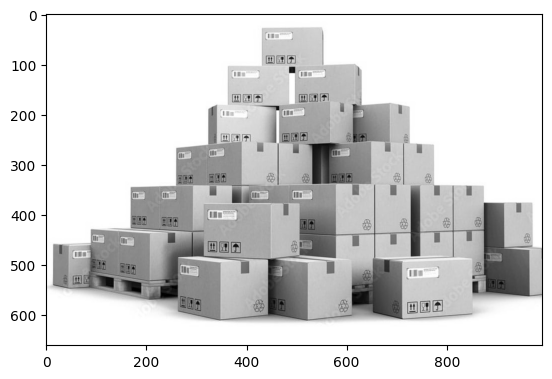

In [171]:
image = cv2.imread('obj2.jpg')  # Replace with your image file
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [172]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)

In [173]:
canny = cv2.Canny(blur, 30, 150)

In [174]:
kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(canny, kernel, iterations=2)
eroded = cv2.erode(dilated, kernel, iterations=1)

In [175]:
cnt, hierarchy = cv2.findContours(eroded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

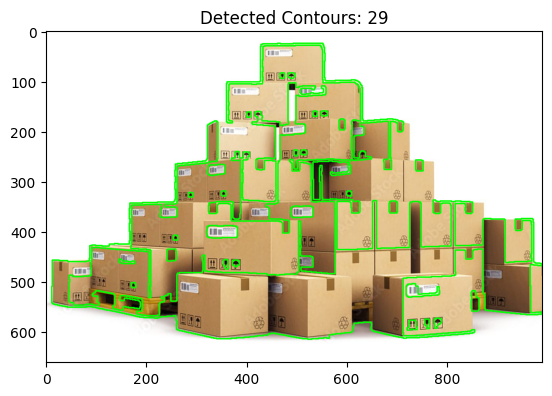

In [176]:
all_contours_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(all_contours_img, cnt, -1, (0, 255, 0), 2)
plt.imshow(all_contours_img)
plt.title(f"Detected Contours: {len(cnt)}")
plt.show()

In [177]:
data = []
for c in cnt:
    x, y, w, h = cv2.boundingRect(c)
    aspect_ratio = float(w) / h
    area = cv2.contourArea(c)
    data.append({
        "X": x,
        "Y": y,
        "Width": w,
        "Height": h,
        "Area": area,
        "Aspect Ratio": aspect_ratio
    })


Detection results saved to 'box_properties.csv'.


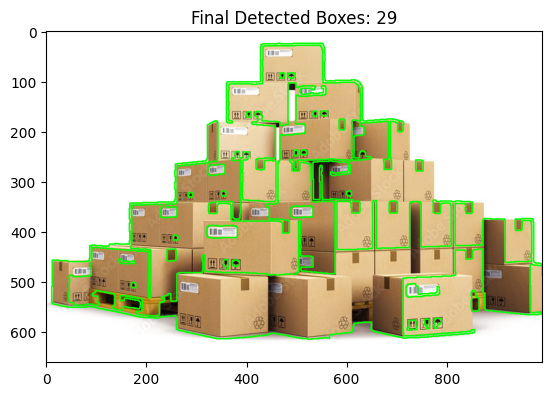

Detected Boxes: 29


In [178]:
df = pd.DataFrame(data)
df.to_csv('box_properties.csv', index=False)
print(f"Detection results saved to 'box_properties.csv'.")
final_output = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(final_output, cnt, -1, (0, 255, 0), 2)
plt.imshow(final_output)
plt.title(f"Final Detected Boxes: {len(cnt)}")
plt.show()

print(f"Detected Boxes: {len(cnt)}")